In [14]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score,roc_curve,auc
from sklearn.feature_selection import VarianceThreshold

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
!ls "/content/gdrive/My Drive/Colab Data/CVD/"

cardiovascular_diseases_dv3.csv


In [18]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Data/CVD/cardiovascular_diseases_dv3.csv", sep=';')

In [19]:
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


Plotting Multiple Visualizations to find correlations between all variables


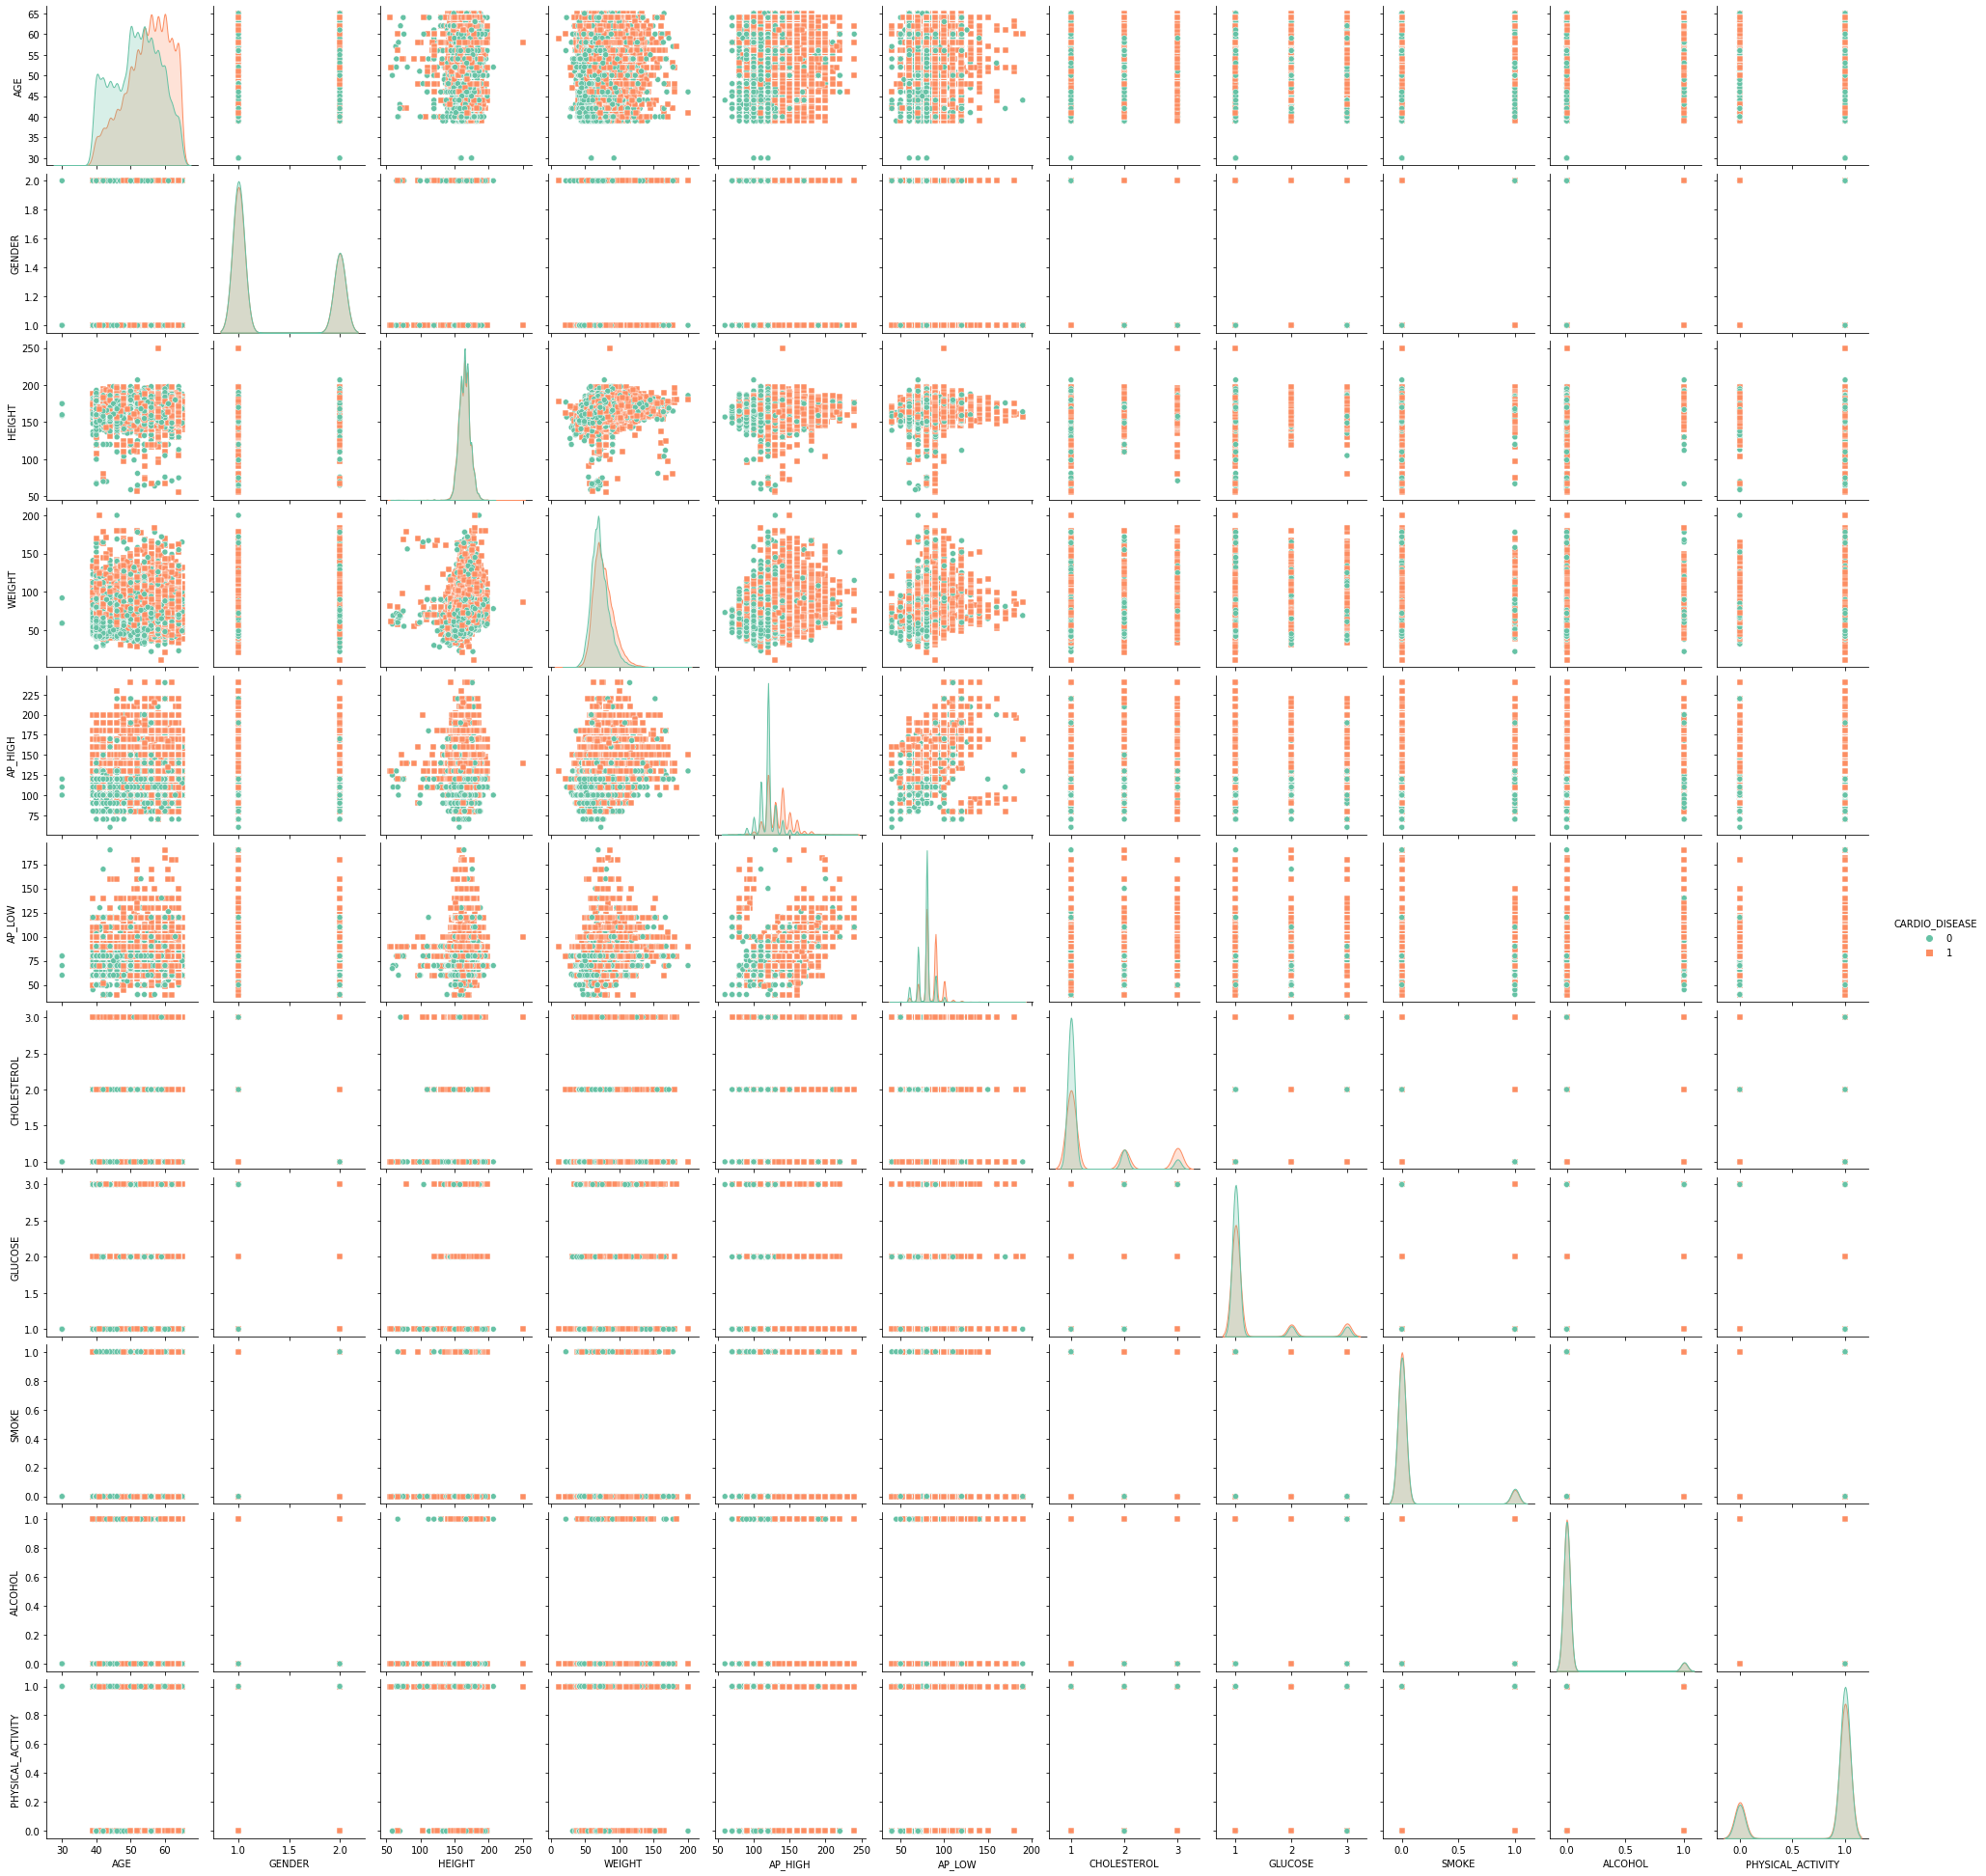

In [ ]:
sns.pairplot(df, kind="scatter", hue="CARDIO_DISEASE", markers=["o", "s"], palette="Set2")
# sns.plt.show()

In [20]:
outcome=df['CARDIO_DISEASE']
df=df.drop(['CARDIO_DISEASE'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df, outcome, test_size=0.25, random_state=42)

# Hyperparamter Grid Search

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4, refit='precision_score')

CV_rfc.fit(df, outcome)
print (CV_rfc.best_params_)

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4, refit='recall_score')

CV_rfc.fit(df, outcome)
print (CV_rfc.best_params_)

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, refit='accuracy_score')

CV_rfc.fit(x_train, y_train)
print (CV_rfc.best_params_)

# Random Forest

In [58]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, criterion='gini', max_depth=10, class_weight='balanced')

In [59]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [60]:
predicted_proba = rfc1.predict_proba(x_test)


In [61]:
threshold=0.45
predictions = (predicted_proba [:,1] >= threshold).astype('int')

In [62]:
Y_test=list(y_test)
Y_pred=list(predictions)

print("Confusion Matrix:")
print (confusion_matrix(Y_test,Y_pred))

print("Classification report:")
print(classification_report(Y_test,Y_pred,target_names=['discharge', 'death']))

print("Kappa score:")
print(cohen_kappa_score(Y_test,Y_pred))

Confusion Matrix:
[[6470 2269]
 [2258 6199]]
Classification report:
              precision    recall  f1-score   support

   discharge       0.74      0.74      0.74      8739
       death       0.73      0.73      0.73      8457

    accuracy                           0.74     17196
   macro avg       0.74      0.74      0.74     17196
weighted avg       0.74      0.74      0.74     17196

Kappa score:
0.47335162165499434


### Important features

In [63]:
importances = list(rfc1.feature_importances_)

feature_list = df.columns

feature_importances = [(feature, round(importance*100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [64]:
ft_imp_dict = {}
for i in feature_importances:
    ft_imp_dict[i[0]] = i[1]

In [65]:
pd.DataFrame(ft_imp_dict, index=["Feature Importance (%)"]).T

,Feature Importance (%)
AP_HIGH,47.12
AP_LOW,17.29
AGE,12.33
CHOLESTEROL,9.38
WEIGHT,6.44
HEIGHT,3.35
GLUCOSE,1.51
PHYSICAL_ACTIVITY,0.96
SMOKE,0.60
GENDER,0.57
